# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira deseja entender melhor o perfil de renda de seus novos clientes para diversos propósitos, como determinar de forma mais precisa o limite de crédito dos cartões sem precisar solicitar contracheques ou documentos que possam impactar negativamente a experiência do cliente.

Assim, a instituição realizou um estudo com alguns clientes, verificando suas rendas por meio de contracheques e outros documentos, e pretende desenvolver um modelo preditivo da renda utilizando algumas variáveis já disponíveis em seu banco de dados.


## Etapa 2 Crisp-DM: Entendimento dos dados
Para o desenvolvimento do modelo, foram fornecidas 13 variaveis e tambem a variavel _target_ **renda**, com seus significados explicitados na tabela seguinte.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  data de referencia                                 | data|
| id_cliente              |  codigo de identificacao do cliente                 | inteiro|
| sexo                    |  sexo do cliente                                    | binario|
| posse_de_veiculo        |  Se possui ou nao veiculos                          | binario|
| posse_de_imovel         |  Se possui ou nao imoveis                           | binario|
| qtd_filhos              |  quantidade de filhos                               | inteiro|
| tipo_renda              |  Tipo da renda (ex.: Empresario)                    | texto|
| educacao                |  Grau de escolaridade (ex.: Secundario)             | texto|
| estado_civil            |  Estado Civil (ex.: Solteiro)                       | texto|
| tipo_residencia         |  Tipo de Residencia (ex.: Casa)                     | texto|
| idade                   |  Idade do cliente                                   | inteiro|
| tempo_emprego           |  Tempo de emprego (anos)                            | float|
| qt_pessoas_residencia   |  Quantidade de pessoas na residencia do cliente     | inteiro|
| **renda**               |  Valor da renda do cliente                          | float|





#### Carregando os pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Carregando os dados


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
renda.drop("Unnamed: 0", axis=1, inplace=True)
renda.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada

In [5]:
renda.describe()

,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


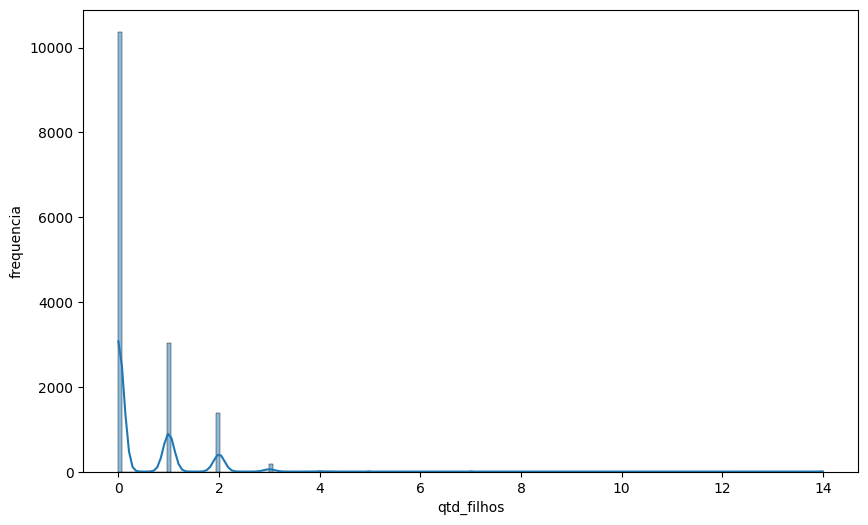

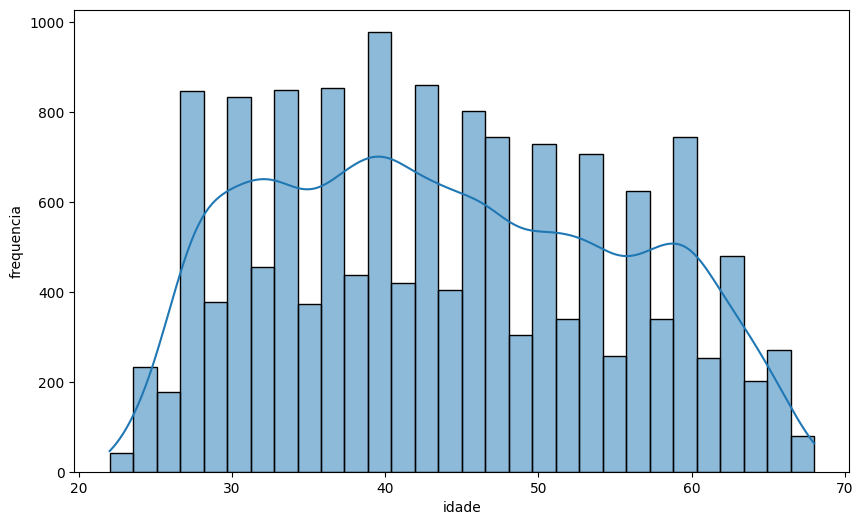

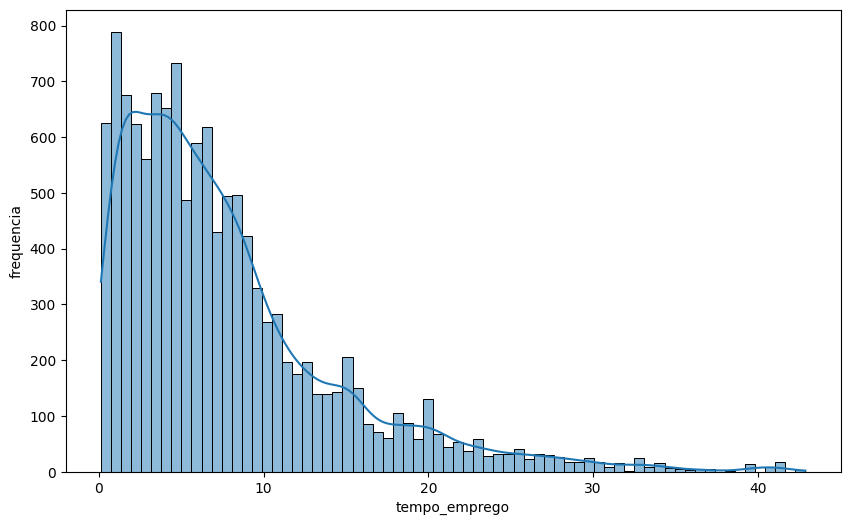

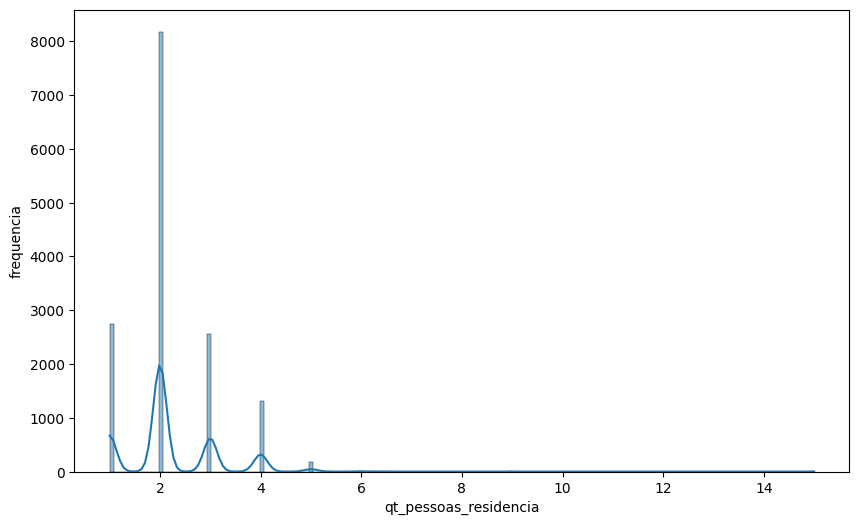

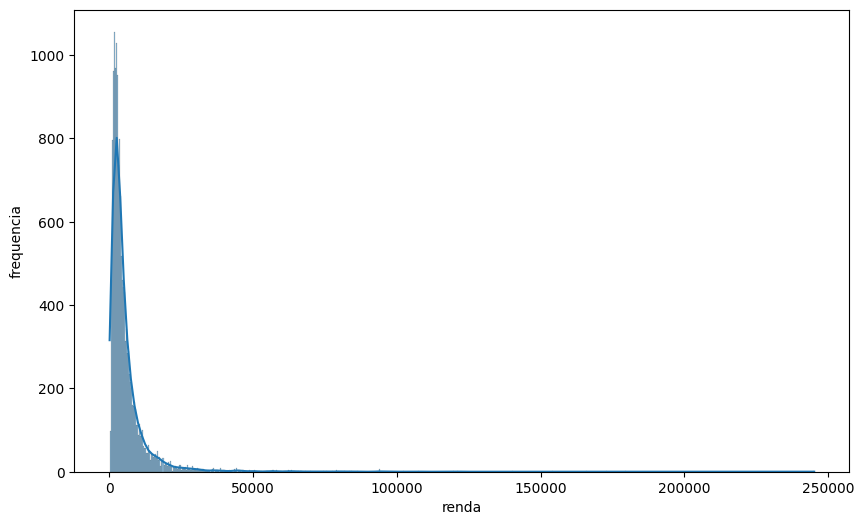

In [6]:
### Plotagens para entender a distribuicao das variaveis
numericas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for var in numericas:
    plt.figure(figsize=(10,6))
    sns.histplot(data=renda, x=var, kde=True)
    plt.xlabel(var)
    plt.ylabel('frequencia')
    plt.show()
    

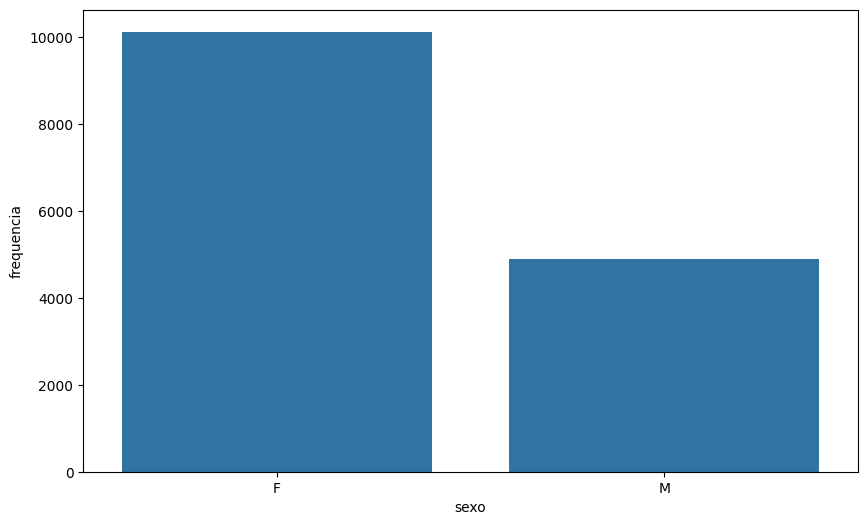

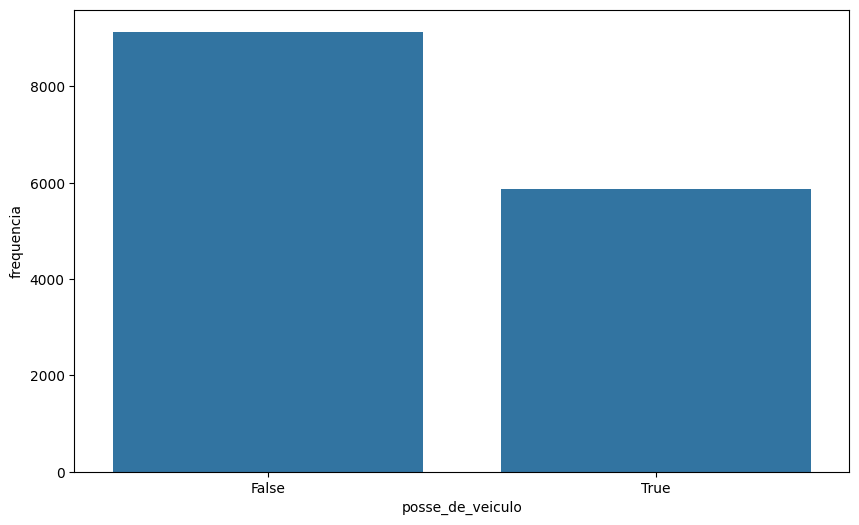

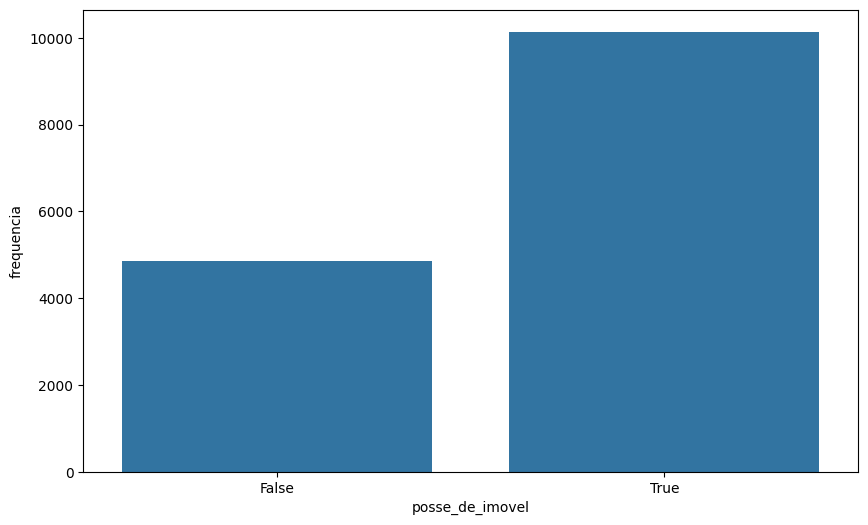

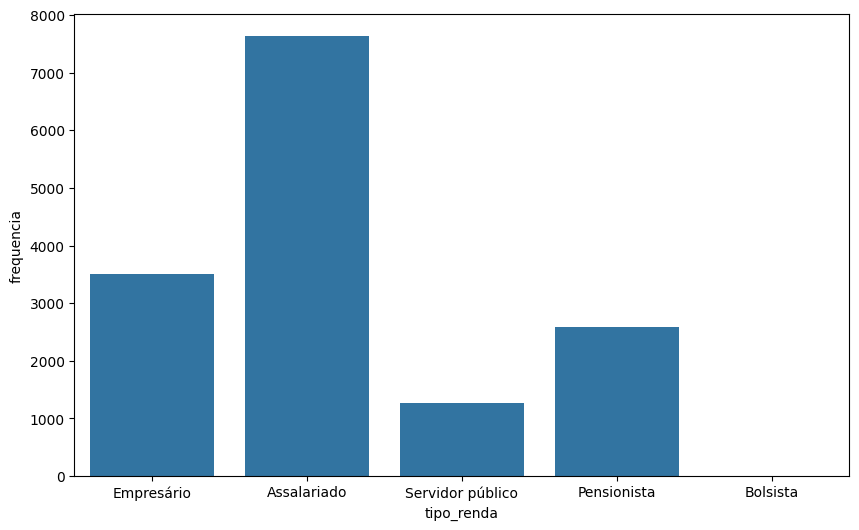

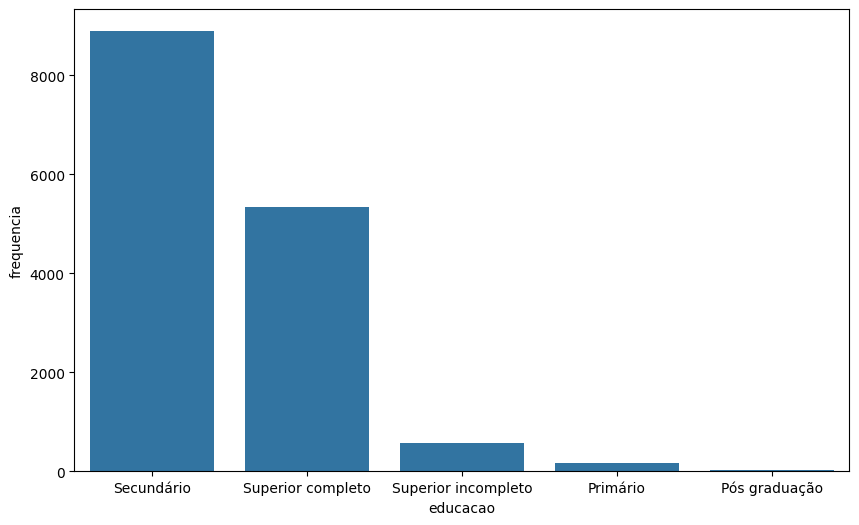

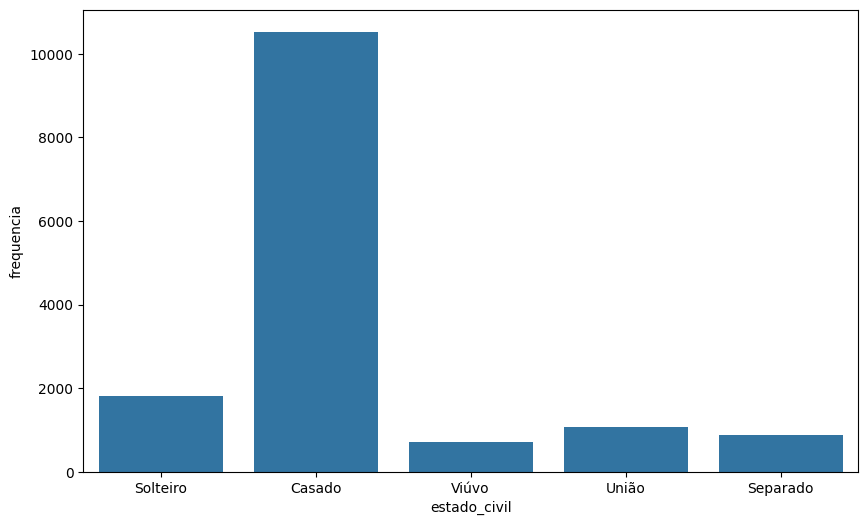

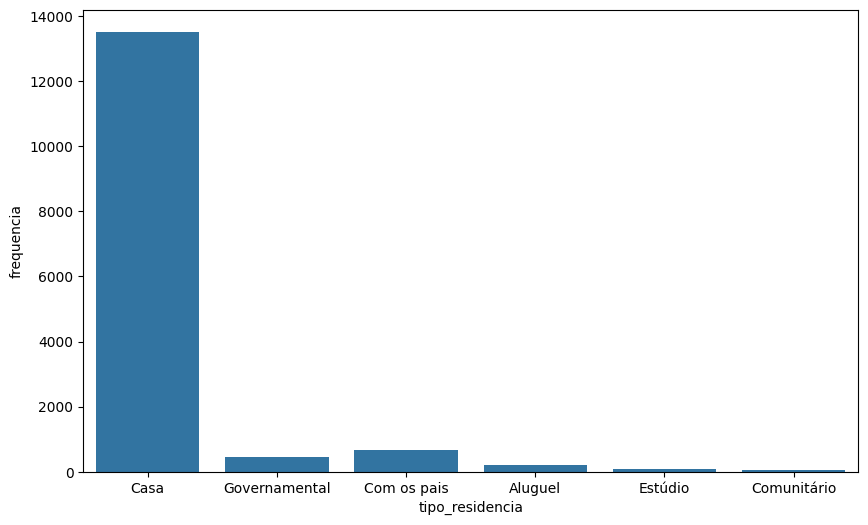

In [7]:
for var in categoricas:
    plt.figure(figsize=(10,6))
    sns.countplot(data=renda, x=var)
    plt.xlabel(var)
    plt.ylabel('frequencia')
    plt.show()

#### Entendimento dos dados - Bivariadas




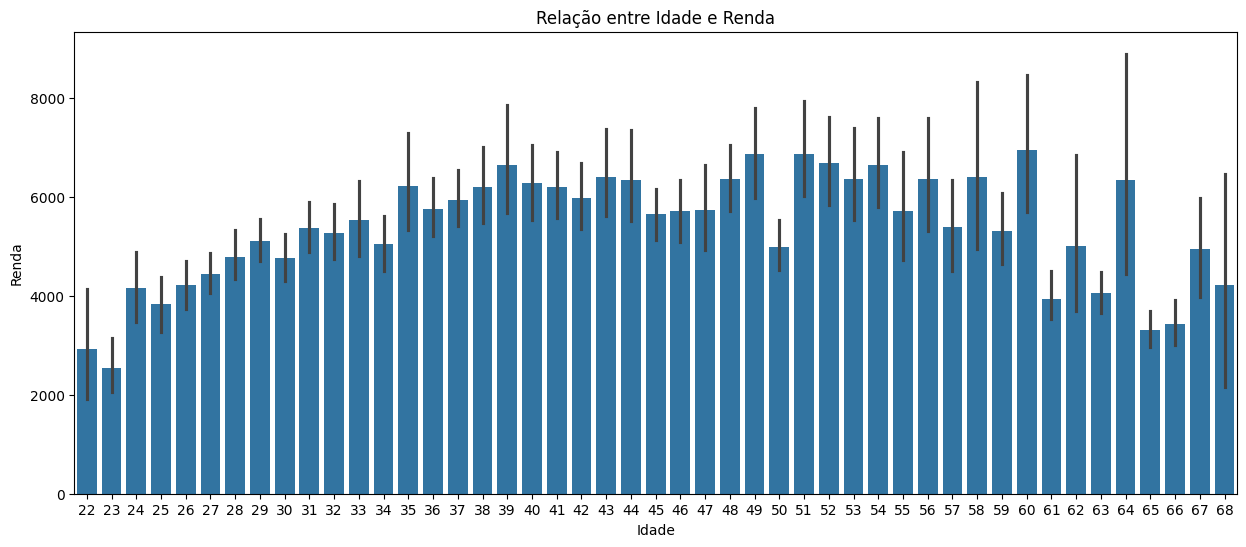

In [8]:
# Gráfico de Dispersão
plt.figure(figsize=(15, 6))
sns.barplot(x='idade', y='renda', data=renda)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

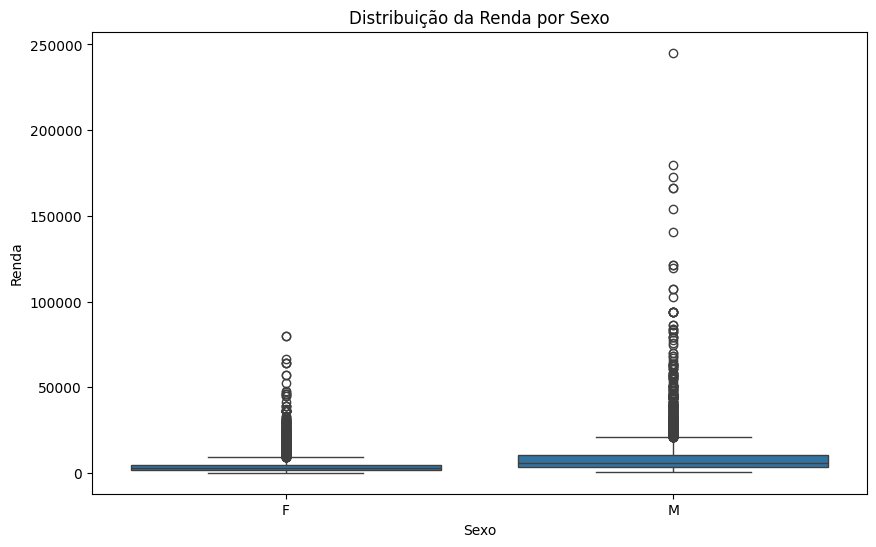

In [9]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='renda', data=renda)
plt.title('Distribuição da Renda por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.show()

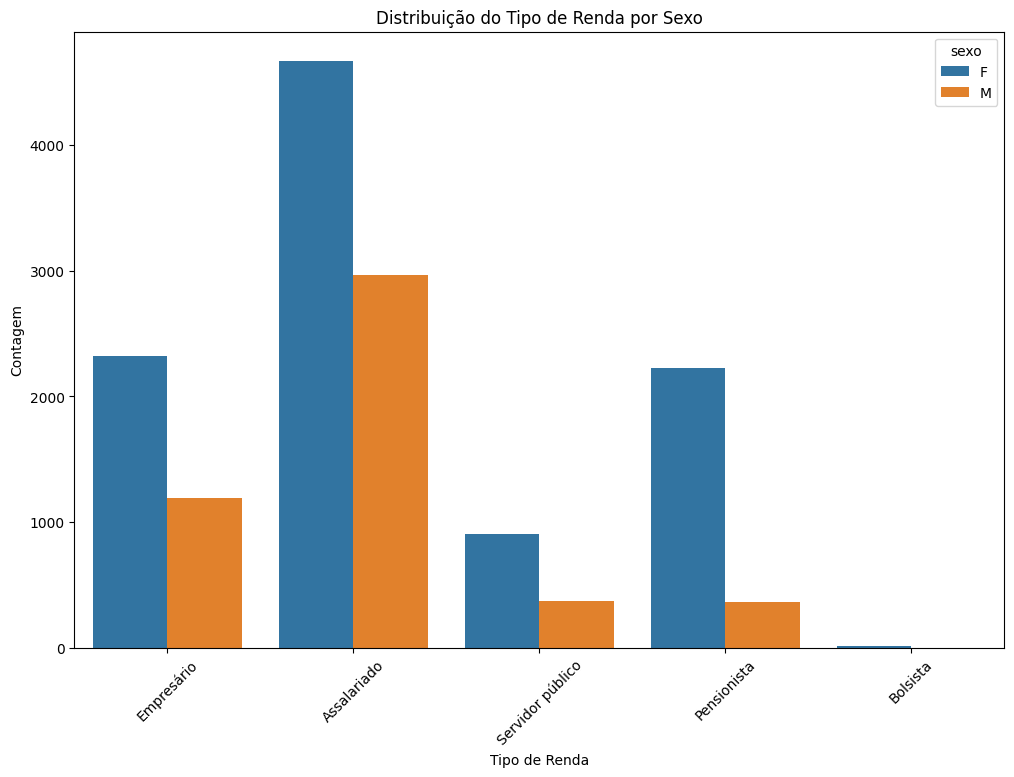

In [10]:
# Gráfico de Barras
plt.figure(figsize=(12, 8))
sns.countplot(x='tipo_renda', hue='sexo', data=renda)
plt.title('Distribuição do Tipo de Renda por Sexo')
plt.xlabel('Tipo de Renda')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [11]:
# verificando os tipos das variaveis
renda.dtypes

data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [12]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
renda['qt_pessoas_residencia'] = renda['qt_pessoas_residencia'].astype(int)

In [13]:
# verificando valores nulos
renda.isna().sum()

data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [14]:
# pelo tamanho do dataset, optei por dropar os valores NA
renda.dropna(inplace=True)
renda.isna().sum()

data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

## Etapa 4 Crisp-DM: Modelagem


Como em outras tarefas já trabalhamos com esse dataset com regressão linear e regressão ridge/lasso, dessa vez vou implementar uma árvore de decisão.

### Rodando o modelo


In [15]:
# Preparando os dados para rodar o modelo
X = renda.drop(['data_ref', 'id_cliente', 'renda'], axis=1)
y = renda['renda']

In [16]:
# Criando dummies
X = pd.get_dummies(data=X)
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,True,True,0,28,7.183562,2,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True


In [17]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# Definindo o modelo
dtr = DecisionTreeRegressor()

In [19]:
# Ajuste de hiperparametros - encontrando o melhor modelo

# definindo grid de parametros
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Setar grid search e ajustar as arvores
grid_search = GridSearchCV(dtr, param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4]})

In [20]:
# Melhor árvore
best_dtr = grid_search.best_params_
best_dtr

{'max_depth': 4, 'min_samples_leaf': 2}

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [21]:
# Avaliando o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print('r2: ', r2)

r2:  0.30243220355787603


In [22]:
# Exportar modelo para o formato do streamlit
joblib.dump(best_model, './output/best_model.pkl')

['./output/best_model.pkl']

In [24]:
# Exportando colunas para rodar no streamlit
joblib.dump(X.columns, './output/columns.pkl')

['./output/columns.pkl']

## Etapa 6 Crisp-DM: Implantação

Foi desenvolvida uma aplicação com streamlit para que o usuario possa utilizar o modelo para novas previsões